
 ================= Data Check ================= 

Total # of rows:  7043
Total # of columns:  21

Data Types: 
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

 ================= Unique Values For Each Attribute ================= 


# of unique values:
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines  

The accuracy of the Logistic Model is: 0.8139931740614335

The confusion matrix:
 [[1198  131]
 [ 196  233]]
             precision    recall  f1-score   support

          0       0.86      0.90      0.88      1329
          1       0.64      0.54      0.59       429

avg / total       0.81      0.81      0.81      1758

The accuracy of the Decision Tree is: 0.8020477815699659

The confusion matrix:
 [[1180  149]
 [ 199  230]]
             precision    recall  f1-score   support

          0       0.86      0.89      0.87      1329
          1       0.61      0.54      0.57       429

avg / total       0.79      0.80      0.80      1758



/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


The accuracy of the Random Forest is: 0.8196814562002275

The confusion matrix:
 [[1231   98]
 [ 219  210]]
             precision    recall  f1-score   support

          0       0.85      0.93      0.89      1329
          1       0.68      0.49      0.57       429

avg / total       0.81      0.82      0.81      1758

The accuracy of the KNN is: 0.7832764505119454

The confusion matrix:
 [[1244   85]
 [ 296  133]]
             precision    recall  f1-score   support

          0       0.81      0.94      0.87      1329
          1       0.61      0.31      0.41       429

avg / total       0.76      0.78      0.76      1758

The accuracy of the Naive Bayes is: 0.7650739476678043

The confusion matrix:
 [[1058  271]
 [ 142  287]]
             precision    recall  f1-score   support

          0       0.88      0.80      0.84      1329
          1       0.51      0.67      0.58       429

avg / total       0.79      0.77      0.77      1758



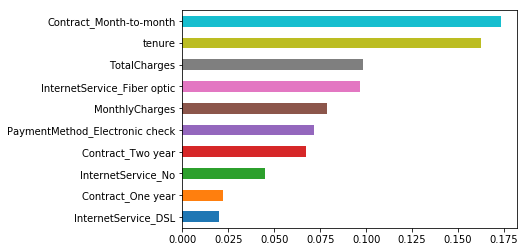

In [1]:
#Import Pandas and Numpy
import pandas as pd
import numpy as np

#Load raw data
telcom = pd.read_csv("/Users/xiyu/Desktop/Ryerson/Capstone Project/WA_Fn-UseC_-Telco-Customer-Churn.csv")

#Check the first 5 obs
telcom.head()

print("\n ================= Data Check ================= \n")

#Check # of rows and columns
print("Total # of rows: ", telcom.shape[0])
print("Total # of columns: ", telcom.shape[1])

#Check data types of the attributes
print("\nData Types: \n", telcom.dtypes)



print("\n ================= Unique Values For Each Attribute ================= \n")

#Check unique values
print("\n# of unique values:\n",telcom.nunique())   

#Unique values of each attribute
col_name = telcom.columns.tolist()
for col in col_name:
    print ("\nValues in",col,"are: \n",telcom[col].unique())



    
print("\n ================= Data Manipulation ================= \n")

#Notice TotalCharges is char, so convert it to numeric
telcom.TotalCharges = pd.to_numeric(telcom.TotalCharges, errors='coerce')

#Check missing values
print("\n# of missing values:\n",telcom.isnull().sum())

#telcom["test"]=np.where(telcom["TotalCharges"]==0, "Yes","No")
#telcom.loc[:,("test","TotalCharges")]

#Remove rows with missing value of TotalCharges
telcom.dropna(inplace=True)
telcom = telcom[telcom.TotalCharges.notnull()]


#Change “No internet service” to “No” for six columns
replace_col = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies']
for col in replace_col:
    telcom[col] = telcom[col].replace({'No internet service':'No'})
    
#Change "No phone service" to "No" for MultipleLines
telcom["MultipleLines"] = telcom["MultipleLines"].replace({"No phone service":"No"})

#Change 1/0 in SeniorCitizen to Yes/No
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:'Yes',0:'No'})


#Change Yes/No in Churn to 1/0
telcom["Churn"] = telcom["Churn"].replace({'Yes':1,'No':0})


#Final check of unique value
for col in col_name:
    print ("\nCheck - Values in",col,"are: \n",telcom[col].unique())

    
#Final Datasets
tlc = telcom.drop(["customerID"],1)



######## EDA #########

tlc["Churn"].value_counts()

#Divide the variables into categorical and numeric
cat_col = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
           'OnlineSecurity','OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies',
          'Contract','PaperlessBilling','PaymentMethod']
num_col = ['tenure','MonthlyCharges','TotalCharges']

# Plot the frequency of each categorical variable
import matplotlib.pyplot as plt
%matplotlib inline
plt.show()

fig, axes = plt.subplots(nrows = 4,ncols = 4,figsize = (20,16))
for i, item in enumerate(cat_col):
    if i < 4:
        ax = tlc[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=4 and i < 8:
        ax = tlc[item].value_counts().plot(kind = 'bar',ax=axes[i-4,1],rot = 0)
        
    elif i>=8 and i < 12:
        ax = tlc[item].value_counts().plot(kind = 'bar',ax=axes[i-8,2],rot = 0)
        
    elif i>=12 and i < 16:
        ax = tlc[item].value_counts().plot(kind = 'bar',ax=axes[i-12,3],rot = 0)
    
    elif i>=16 and i < 20:
        ax = tlc[item].value_counts().plot(kind = 'bar',ax=axes[i-16,4],rot = 0)
 
    ax.set_title(item)
    
    
#CrossTab all categorical variables against target variable
for col in cat_col:
    print("\n ----\n", pd.crosstab(tlc["Churn"], tlc[col], margins=True))
    

#Distribution of numerical variables    
from matplotlib import pyplot
pyplot.hist(tlc['tenure'])
pyplot.hist(tlc['TotalCharges'])   
pyplot.hist(tlc['MonthlyCharges'])

#Correlation of numeric variables
np.corrcoef(tlc["Churn"], tlc["tenure"])

#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(12,4))
tlc_numeric = tlc[["Churn","TotalCharges","tenure","MonthlyCharges"]]
tlc_numeric.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

#Summary Stats of Numerical Variables
tlc["TotalCharges"].describe().transpose().reset_index()
tlc["MonthlyCharges"].describe().transpose().reset_index()
tlc["tenure"].describe().transpose().reset_index()




#### Model Implementation ####

#Generate dummy variables for categorical data
tlc_dummies = pd.get_dummies(tlc)
tlc_dummies.head()

y = tlc_dummies['Churn'].values
X = tlc_dummies.drop(columns = ['Churn'])


#Train/Test Data Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


# Scaling all the variables to a range of 0 to 1, do it separately for training and test datasets
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
scaler.fit(X_test)




#### Logit Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_logit = LogisticRegression()
result = model_logit.fit(X_train, y_train)
y_pred = model_logit.predict(X_test)

# Print the prediction accuracy
print ("The accuracy of the Logistic Model is:", metrics.accuracy_score(y_test, y_pred))

#Confusion Matrix
print("\nThe confusion matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



### Decision Tree

from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5, min_samples_leaf=5)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

# Print the prediction accuracy
print ("The accuracy of the Decision Tree is:", metrics.accuracy_score(y_test, y_pred))

#Confusion Matrix
print("\nThe confusion matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot Feature Importance
import matplotlib.pyplot as plt
%matplotlib inline
plt.show()

importances = model_dt.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')





###Random Forest

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = 2,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

# Print the prediction accuracy
print ("The accuracy of the Random Forest is:", metrics.accuracy_score(y_test, y_pred))

#Confusion Matrix
print("\nThe confusion matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Plot Feature Importance

import matplotlib.pyplot as plt
%matplotlib inline
plt.show()

importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')




### KNN 

from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors = 71, p=2, metric = 'euclidean')

model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

# Print the prediction accuracy
print ("The accuracy of the KNN is:", metrics.accuracy_score(y_test, y_pred))

#Confusion Matrix
print("\nThe confusion matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))




### Naive Bayes

from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()

model_nb.fit(X_train, y_train)
y_pred = model_nb.predict(X_test)

# Print the prediction accuracy
print ("The accuracy of the Naive Bayes is:", metrics.accuracy_score(y_test, y_pred))

#Confusion Matrix
print("\nThe confusion matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))